# Demo 1: Agglomerative Clustering
    - Read the data file
    - Do pair plotting
    - Based on findings of pair plot, perform agglomerative clustering
    - scatter plot
    - compute distance matrix
    - dendrograms plotting

In [2]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
#print(os.listdir("../"))

In [3]:
df = pd.read_csv('SuperMarketData.csv')
df.head()

,CustomerID,Gender,Age,Monthly Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(index=str, columns={'Monthly Income (kRs)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


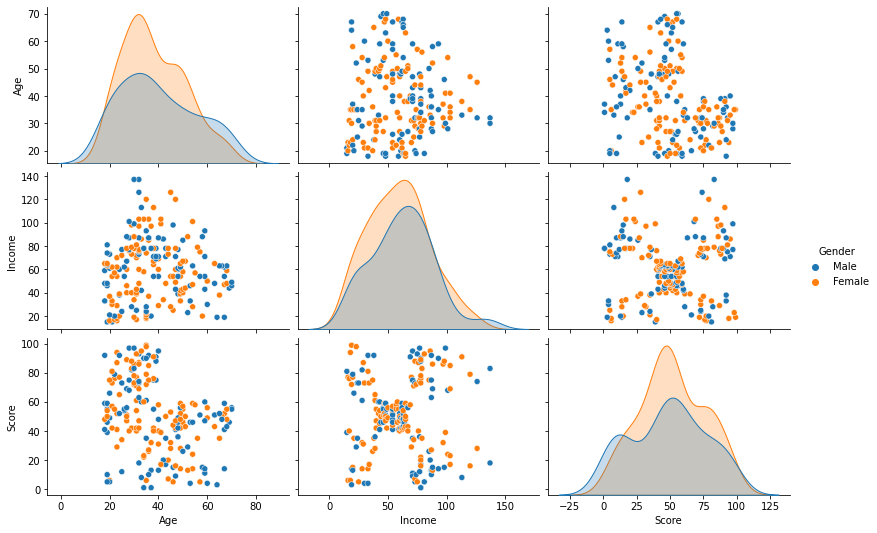

In [6]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [7]:
# From the above plot we see that gender has no direct relation to segmenting customers. 
#That's why we can drop it and move on with other features which is why 
#we will X parameter from now on.
X = df.drop(['CustomerID', 'Gender'], axis=1)

### PCA (Principal Component Analysis)
PCA is only done for large data sets. to convert corelated data to un-corelated data.

#### Agglomeration 
 - Agglomerate is a coarse accumulation of large blocks 
 - An agglomeration is a (messy) cluster or jumbled collection of various elements. It can  also refer to the process of agglomerating—gathering into a cluster (or mass)

In [8]:
from sklearn.cluster import AgglomerativeClustering 

In [9]:
cluster_nos = 5
aggl_clust = AgglomerativeClustering(n_clusters=cluster_nos, linkage='average').fit(X)

X['Labels'] = aggl_clust.labels_

In [11]:
X['Labels'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [12]:
s = str(cluster_nos)

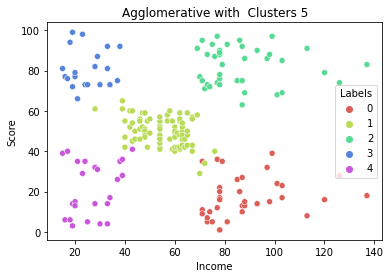

In [13]:
#plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', cluster_nos))
plt.title('Agglomerative with  Clusters ' + s)
plt.show()

### Dendrogram Associated for the Agglomerative Hierarchical Clustering

A distance matrix contains the distance from each point to every other point of a dataset .
We can use the function distance_matrix, which requires two inputs. 
The distance values are symmetric, with a diagonal of 0's (This is one way of making sure your matrix is correct) 

In [14]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

In [15]:
dist = distance_matrix(X, X)

In [16]:
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

    The distance matrix
    'complete' for complete linkage



In [17]:
#method='single', method='average', method='complete'
Z = hierarchy.linkage(dist, method='average') 

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

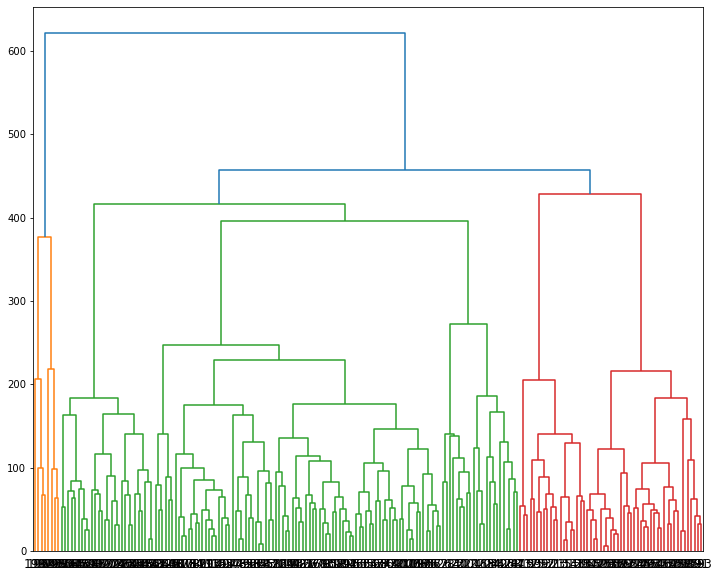

In [18]:
plt.figure(figsize=(12, 10)) #orientation='right'
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

In [19]:
#method='single', method='average', method='complete'
Z = hierarchy.linkage(dist, method='complete') 

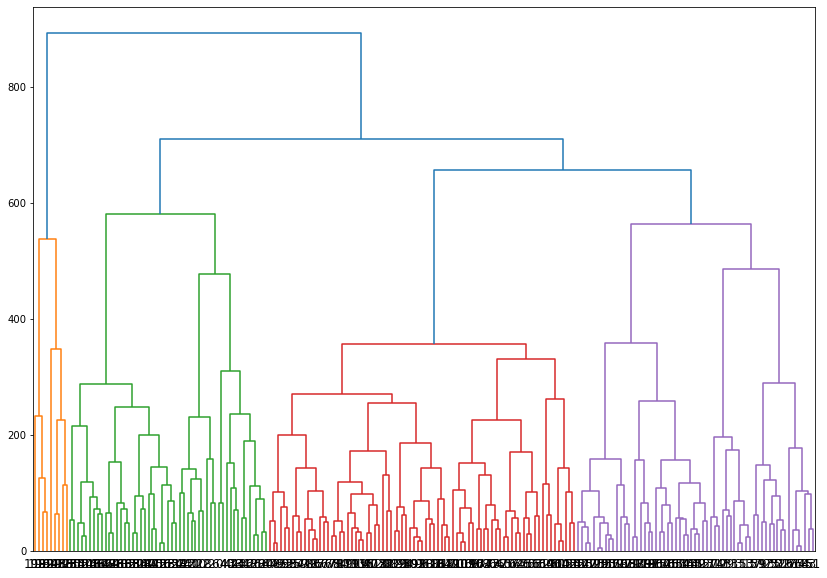

In [20]:
plt.figure(figsize=(14, 10)) #orientation='right'
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')